# Visualize waypoints and fitting polynomials through them

In [1]:
import pprint
import sys, os
import numpy as np
from matplotlib.pyplot import *
%matplotlib notebook
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import axes3d, Axes3D
import scipy
from scipy.interpolate import splprep, splev, interp1d

import pandas as pd

In [2]:
WAYPOINT_FILE="../data/highway_map.csv"
# columns: x, y, s, d_x, d_y
waypoints = pd.read_csv(WAYPOINT_FILE, delimiter=" ", names=["x", "y", "s", "dx", "dy"])
waypoints

,x,y,s,dx,dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992
5,934.9677,1135.055,150.375551,0.059044,-0.998255
6,964.7734,1138.318,180.359314,0.167776,-0.985825
7,995.2703,1145.318,211.649355,0.307789,-0.951455
8,1025.0280,1157.810,243.922915,0.382558,-0.923932
9,1054.4980,1169.842,275.754606,0.381560,-0.924344


<IPython.core.display.Javascript object>


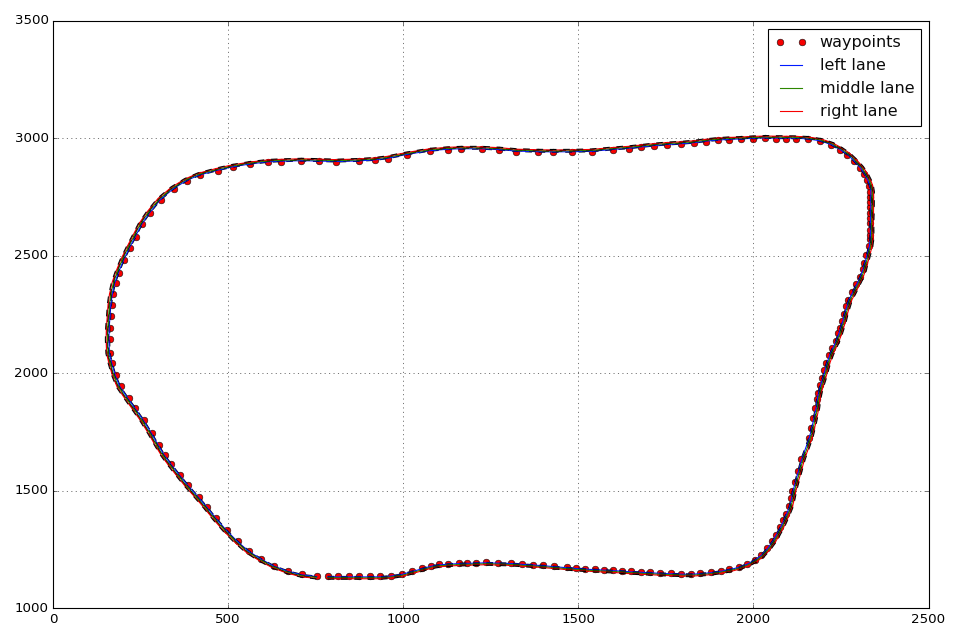

In [3]:
px = pd.to_numeric(waypoints["x"]).values
py = pd.to_numeric(waypoints["y"]).values
dx = pd.to_numeric(waypoints["dx"]).values
dy = pd.to_numeric(waypoints["dy"]).values
fig1 = figure(figsize=(12,8))
plot(px, py, 'ro', label="waypoints")
plot(px, py, "--", color="black");
plot(px+dx*2, py+dy*2, label="left lane");
plot(px+dx*4, py+dy*4, "--", color="black");
plot(px+dx*6, py+dy*6, label="middle lane");
plot(px+dx*8, py+dy*8, "--", color="black");
plot(px+dx*10, py+dy*10, label="right lane");
plot(px+dx*12, py+dy*12, "--", color="black");
grid(); legend(); tight_layout(); show()

# Piecewise polynomial interpolation of waypoints
Seems to be a rather bad idea...

px:  [ 784.6001  815.2679  844.6398  875.0436  905.283 ]
x_samples:  [784.6001, 790.95183157894735, 797.3035631578947, 803.65529473684205, 810.00702631578952, 816.35875789473687, 822.71048947368422, 829.06222105263157, 835.41395263157892, 841.76568421052627, 848.11741578947374, 854.46914736842109, 860.82087894736844, 867.17261052631579, 873.52434210526314, 879.8760736842105, 886.22780526315796, 892.57953684210531, 898.93126842105266, 905.28300000000002]
coeffs:  [  2.14464490e+03  -3.50591560e+00   4.05610228e-03  -1.56371306e-06]


<IPython.core.display.Javascript object>


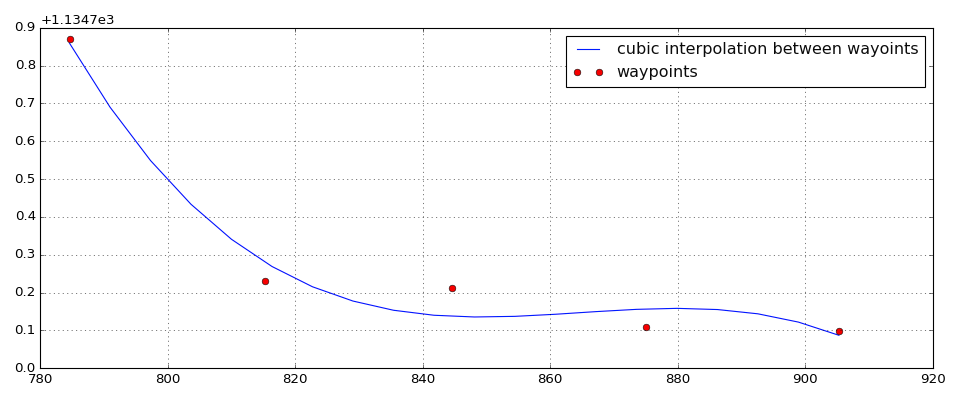

In [4]:
wp_num = 5
poly_degree = 3
interp_num = 20
dx = (px[wp_num-1] - px[0]) / (interp_num-1)
x_samples = [px[0]+dx*i for i in range(interp_num)]
print("px: ", px[:wp_num])
print("x_samples: ", x_samples)
coeffs = np.polyfit(x=px[:wp_num], y=py[:wp_num], deg=poly_degree)
print("coeffs: ", coeffs[::-1])
y_interp = np.polyval(p=coeffs, x=x_samples)
fig = figure(figsize=(12,5))
plot(x_samples, y_interp, label="cubic interpolation between wayoints");
plot(px[:wp_num], py[:wp_num], 'ro', label="waypoints")
grid(); legend(); tight_layout(); show()

# Piecewise interpolation for the whole track
Looks really really bad...

<IPython.core.display.Javascript object>


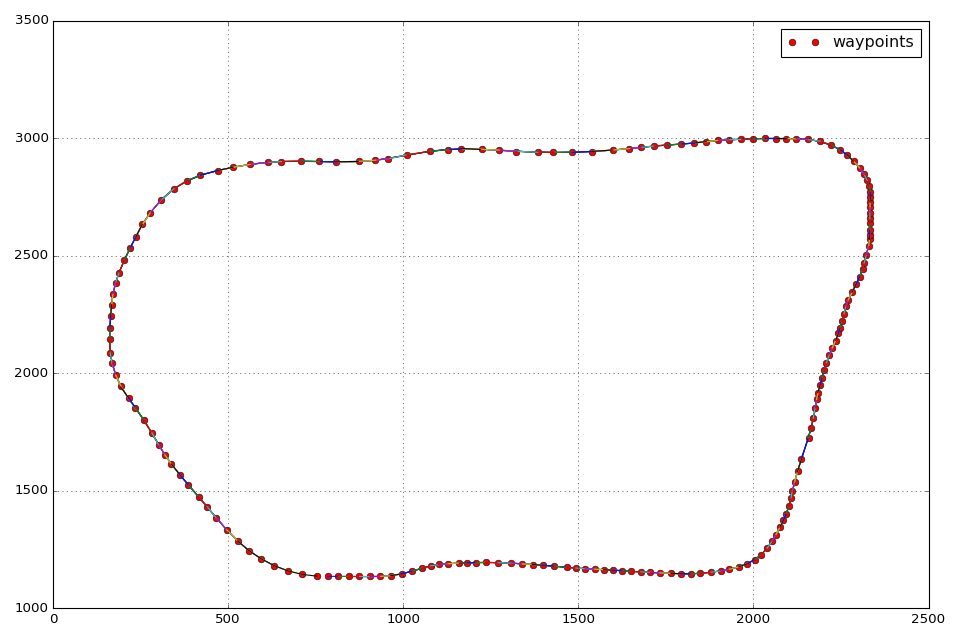

In [5]:
wp_num = 6
poly_degree = 3
interp_num = 21

fig = figure(figsize=(12,8))
plot(px, py, 'ro', label="waypoints")
for wp_idx in range(px.shape[0]-wp_num):
    vals = [i for i in range(wp_num+1)]
    coeffs_x = np.polyfit(vals, px[wp_idx:wp_idx+wp_num+1], deg=poly_degree)
    coeffs_y = np.polyfit(vals, py[wp_idx:wp_idx+wp_num+1], deg=poly_degree)    
    x_samples = np.linspace(px[wp_idx], px[wp_idx+2], interp_num)
    y_samples = np.linspace(py[wp_idx], py[wp_idx+2], interp_num)
    x_interp = np.polyval(coeffs_x, vals)
    y_interp = np.polyval(coeffs_y, vals)
    plot(x_interp, y_interp);

grid(); legend(); tight_layout(); show()

# Polynomial interpolation over whole track at once
Polynomial don't capture all points for x and y, therefore they seem to be useless for this task.
This really is a task for splines, which make sure to go through all points of the fit.

<IPython.core.display.Javascript object>


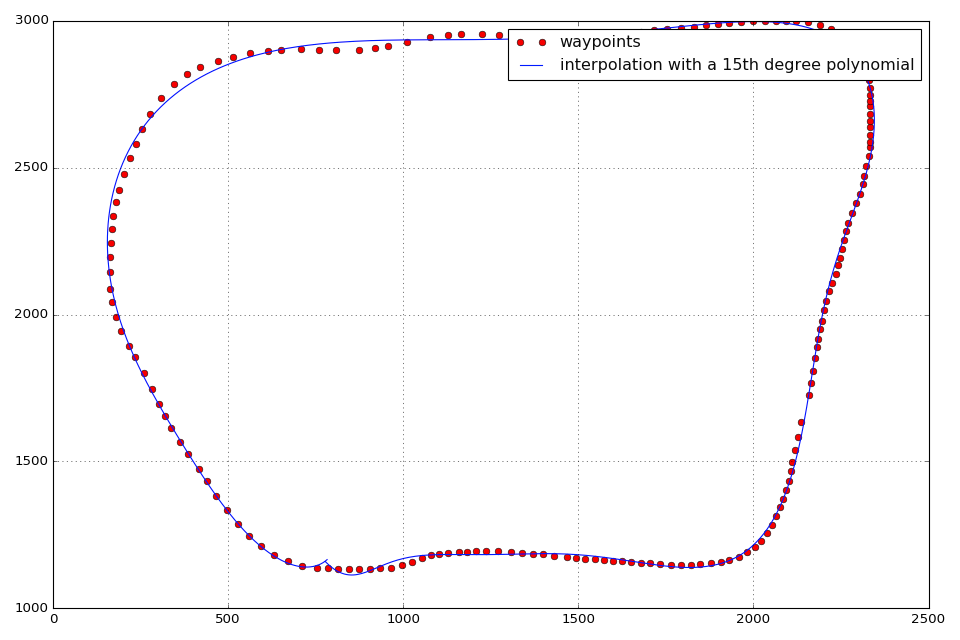

In [6]:
poly_degree = 15
# 5x the original number of points
interp_num = np.linspace(0, px.shape[0], 5*px.shape[0])

fig = figure(figsize=(12,8))
plot(px, py, 'ro', label="waypoints")
vals = [i for i in range(px.shape[0])]
coeffs_x = np.polyfit(vals, px, poly_degree)
coeffs_y = np.polyfit(vals, py, poly_degree)    
x_interp = np.polyval(coeffs_x, interp_num)
y_interp = np.polyval(coeffs_y, interp_num)
plot(x_interp, y_interp, label="interpolation with a {}th degree polynomial".format(poly_degree));
grid(); legend(); tight_layout(); show()

# Interpolation of whole track with cubic splines
Comparison of b-spline and cubic spline interpolations.
The b-spline interpolator was configured to expect a periodic signal and therefore is able to connect the last and the first waypoint polygon.
Except for that, the b-spline and cubic spline are very similar in shape and precision.

Interesting question and answers here:
https://stackoverflow.com/questions/31464345/fitting-a-closed-curve-to-a-set-of-points

/home/phil/.conda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[0][181]=x[0][0]
  (i, m, i)))
/home/phil/.conda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/scipy/interpolate/_fitpack_impl.py:226: RuntimeWarning: Setting x[1][181]=x[1][0]
  (i, m, i)))


<IPython.core.display.Javascript object>


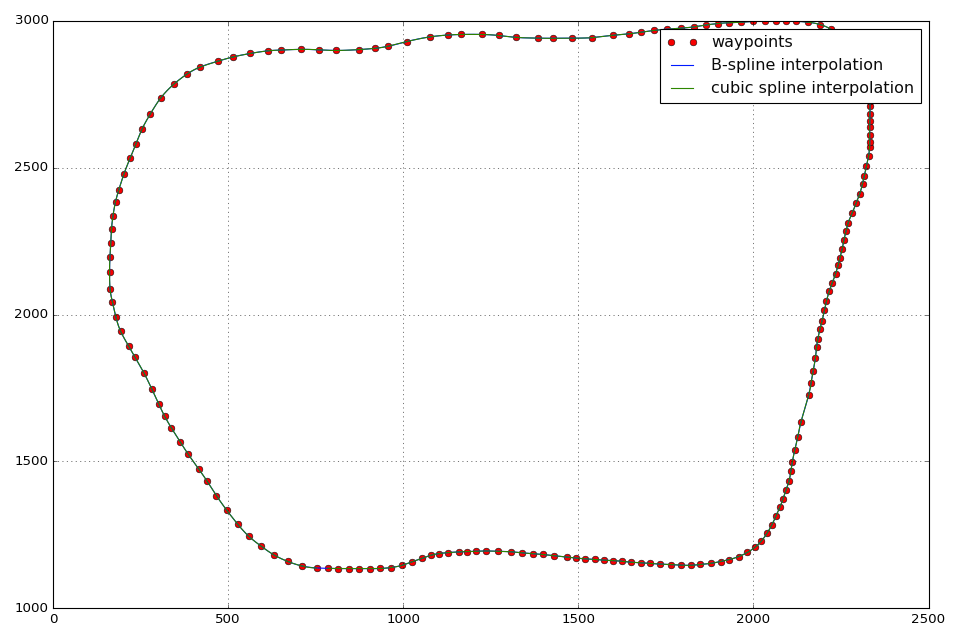

In [7]:
pts = np.dstack((px, py)).squeeze()
tck, u = splprep(pts.T, u=None, s=0.0, per=1) 
u_new = np.linspace(u.min(), u.max(), 5*px.shape[0])
x_new, y_new = splev(u_new, tck, der=0)

i = np.arange(len(pts))
# 5x the original number of points
interp_i = np.linspace(0, i.max(), 5 * i.max())
xi = interp1d(i, px, kind='cubic')(interp_i)
yi = interp1d(i, py, kind='cubic')(interp_i)

fig = figure(figsize=(12,8))
plot(px, py, 'ro', label="waypoints")
plot(x_new, y_new, label="B-spline interpolation");
plot(xi, yi, label="cubic spline interpolation");
grid(); legend(); tight_layout(); show()